# Merton Jump Diffusion Model Simulation

## Theory

The Merton Jump Diffusion Model is an extension of the Black-Scholes model that incorporates sudden jumps in asset prices, in addition to the continuous price changes modeled by a geometric Brownian motion. This model is particularly useful for capturing the behavior of financial markets where asset prices can experience sudden and significant changes.

### Key Components of the Model

1. **Geometric Brownian Motion (GBM):** 
   - Describes the continuous part of the asset price movement.
   - Formula: \( dS_t = \mu S_t dt + \sigma S_t dW_t \)
   - Where:
     - \( S_t \) is the asset price at time \( t \).
     - \( \mu \) is the drift rate.
     - \( \sigma \) is the volatility.
     - \( dW_t \) is a Wiener process (standard Brownian motion).

2. **Poisson Process:**
   - Models the occurrence of jumps.
   - Formula: \( dN_t \sim \text{Poisson}(\lambda dt) \)
   - Where:
     - \( \lambda \) is the average rate of jumps per unit time.

3. **Jump Size:**
   - The size of each jump is modeled as a log-normal distribution.
   - Formula: \( J \sim \text{LogNormal}(\mu_j, \sigma_j) \)
   - Where:
     - \( \mu_j \) is the mean of the jump size.
     - \( \sigma_j \) is the standard deviation of the jump size.

### Combined Model

The Merton Jump Diffusion Model combines these components as follows:

\[ dS_t = \mu S_t dt + \sigma S_t dW_t + J S_t dN_t \]

Where:
- \( J \) is the jump size.
- \( dN_t \) is the Poisson process indicating the occurrence of jumps.

## Code Explanation

The code simulates asset price paths under the Merton Jump Diffusion Model.

### Function: `generatepathMerton`

This function generates multiple paths of asset prices using the Merton Jump Diffusion Model.


In [25]:
import numpy as np
import matplotlib.pyplot as plt 

In [26]:
def generatepathMerton(noofpath,noofsteps,S0,T,xip,muj,sigmaj,r,sigma):
    X=np.zeros([noofpath,noofsteps+1])
    S=np.zeros([noofpath,noofsteps+1])
    time=np.zeros([noofsteps+1])
    dt=T/float(noofsteps)
    X[:,0]=np.log(S0)
    S[:,0]=S0
    EeJ=np.exp(muj+0.5*sigmaj*sigmaj)
    Zpos=np.random.poisson(xip*dt,[noofpath,noofsteps])
    Z=np.random.normal(0.0,1.0,[noofpath,noofsteps])
    J=np.random.normal(muj,sigmaj,[noofpath,noofsteps])
    for i in range(0,noofsteps):
        Z[:,i]=(Z[:,i]-np.mean(Z[:,i]))/np.std(Z[:,i])#normalization
        X[:,i+1]=X[:,i]+(r-xip*(EeJ-1)-0.5*sigma*sigma)*dt+sigma*np.sqrt(dt)*Z[:,i]+J[:,i]*Zpos[:,i]
        time[i+1] = time[i] + dt
    S=np.exp(X)
    paths={'time':time,
           'X':X,
           'S':S}
    return paths 
        
    


### Function: `maincalculation`

This function sets parameters and visualizes the asset price paths.


In [28]:
def maincalculation():
    noofpath=25
    noofsteps=500
    S0=100
    T=5
    xip=1
    muj=0
    sigmaj=0.7
    r=0.05
    sigma=0.2
    Paths=generatepathMerton(noofpath,noofsteps,S0,T,xip,muj,sigmaj,r,sigma)
    timeGrid=Paths['time']
    X=Paths['X']
    S=Paths['S']
    plt.figure(1,figsize=(16,8))
    plt.title('Log of Asset Price Paths under Merton Jump Diffusion Model')
    plt.plot(timeGrid,X.T)   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    plt.figure(2,figsize=(16,8))
    plt.title('Simulated Asset Price Paths under Merton Jump Diffusion Model')
    plt.plot(timeGrid,S.T)   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")



### Explanation

- **Parameters:**
  - `noofpath`: Number of paths to generate.
  - `noofsteps`: Number of time steps.
  - `S0`: Initial asset price.
  - `T`: Total time.
  - `xip`: Jump intensity (λ).
  - `muj`: Mean of the jump size.
  - `sigmaj`: Standard deviation of the jump size.
  - `r`: Risk-free rate.
  - `sigma`: Volatility of the continuous part.

- **Process:**
  1. Initializes arrays for log prices (X), asset prices (S), and time.
  2. Simulates the paths using the Merton Jump Diffusion Model.
  3. Plots the log of asset prices and the actual asset prices over time.

This code provides a practical implementation and visualization of the Merton Jump Diffusion Model, demonstrating its ability to capture both continuous and jump components in asset price movements.

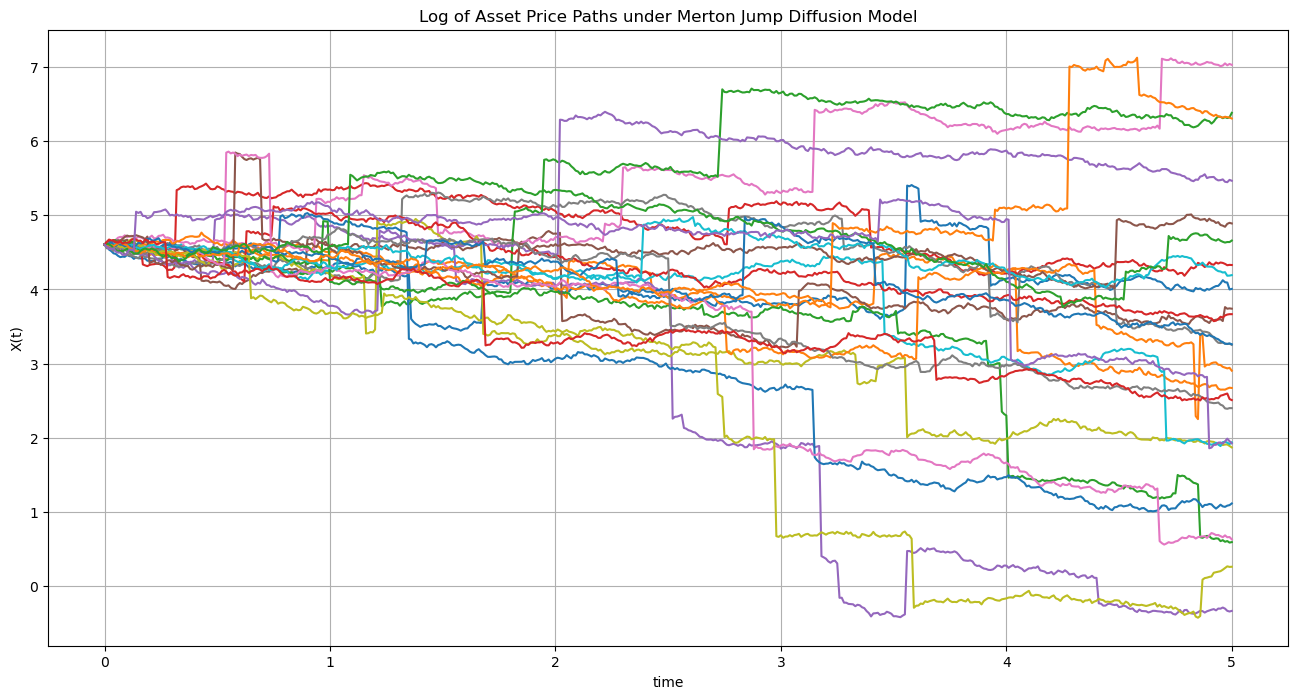

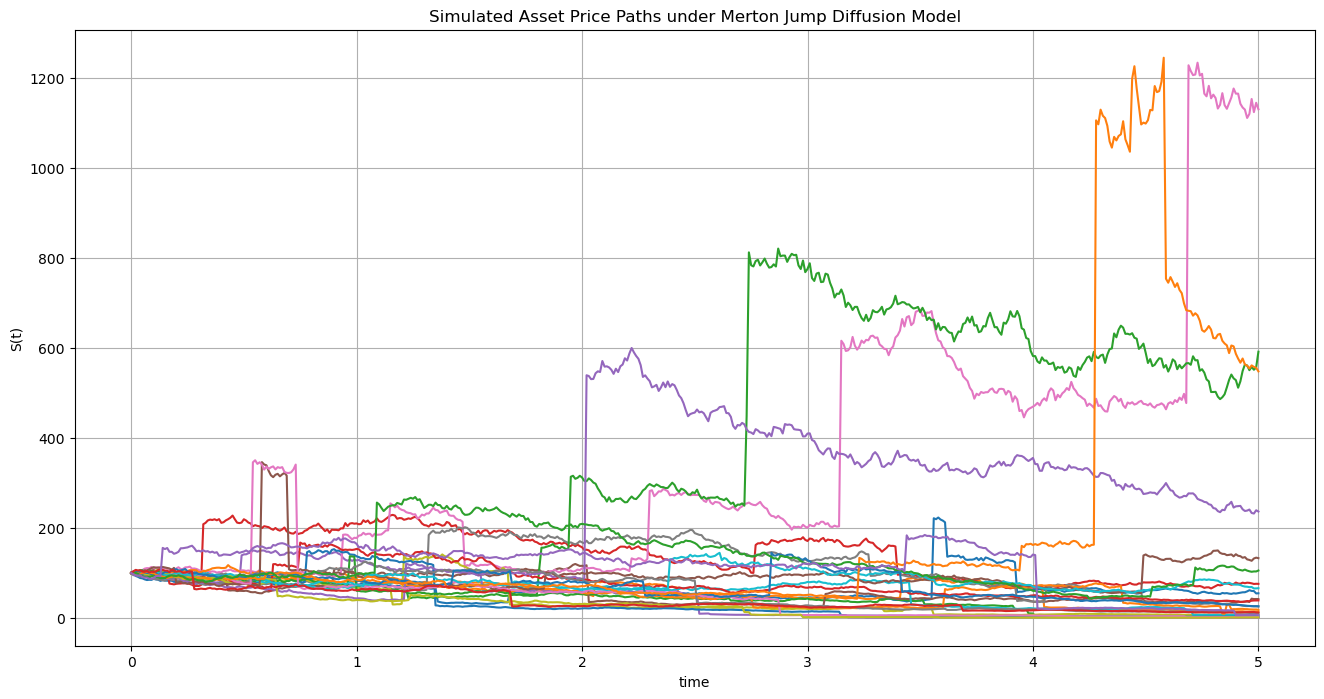

In [29]:
maincalculation()